In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./datasets/train.csv')

# Create a bar chart of missing values

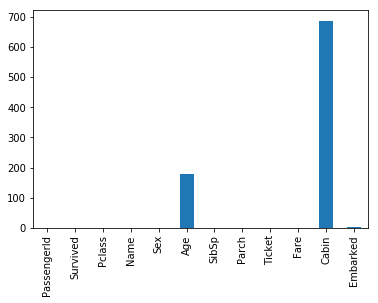

In [2]:
df.apply(pd.isnull, axis=1).sum().plot(kind='bar')

In [3]:
# Remove Embarked NaN values and replace Cabin NaN values
df1 = df[df.Embarked.notnull()].copy()
df1['Cabin'].fillna('null',inplace =True)

In [4]:
# Creation of FamilyCount Column
df1['FamilyCount'] = df1['SibSp'] + df1['Parch']

# Isolation of Title from Name

In [5]:
# Splitting Name into Last Name and Title. First Name
df1_name_split = df1['Name'].str.split(', ', expand=True)
df1 = pd.concat([df1, df1_name_split], axis=1)
df1.rename(columns={0:'last_name', 1:'first_name_title'}, inplace=True)

# Splitting Title. First Name into Title and First Name
df1_first_name_split = df1['first_name_title'].str.split('.', expand=True)
df1 = pd.concat([df1, df1_first_name_split], axis=1)
df1.rename(columns={0:'title', 1:'first_name'}, inplace=True)

# Removing redundent columns and reording them
df1.drop(['Name','first_name_title', 2], axis=1, inplace=True)
df1 = df1[['PassengerId', 'Survived', 'title', 'first_name', 'last_name', 'Age', 'Sex', 'Ticket', 'Fare',
           'Pclass', 'Cabin', 'SibSp', 'Parch', 'FamilyCount', 'Embarked']]

df1.head()

,PassengerId,Survived,title,first_name,last_name,Age,Sex,Ticket,Fare,Pclass,Cabin,SibSp,Parch,FamilyCount,Embarked
0,1,0,Mr,Owen Harris,Braund,22.0,male,A/5 21171,7.2500,3,null,1,0,1,S
1,2,1,Mrs,John Bradley (Florence Briggs Thayer),Cumings,38.0,female,PC 17599,71.2833,1,C85,1,0,1,C
2,3,1,Miss,Laina,Heikkinen,26.0,female,STON/O2. 3101282,7.9250,3,null,0,0,0,S
3,4,1,Mrs,Jacques Heath (Lily May Peel),Futrelle,35.0,female,113803,53.1000,1,C123,1,0,1,S
4,5,0,Mr,William Henry,Allen,35.0,male,373450,8.0500,3,null,0,0,0,S


# Creation of Dummy Columns for Title, Sex, and Embarked

In [6]:
df1 = pd.get_dummies(df1, columns=['title', 'Sex', 'Embarked'])
df1.head()

,PassengerId,Survived,first_name,last_name,Age,Ticket,Fare,Pclass,Cabin,SibSp,...,title_Mrs,title_Ms,title_Rev,title_Sir,title_the Countess,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,Owen Harris,Braund,22.0,A/5 21171,7.2500,3,null,1,...,0,0,0,0,0,0,1,0,0,1
1,2,1,John Bradley (Florence Briggs Thayer),Cumings,38.0,PC 17599,71.2833,1,C85,1,...,1,0,0,0,0,1,0,1,0,0
2,3,1,Laina,Heikkinen,26.0,STON/O2. 3101282,7.9250,3,null,0,...,0,0,0,0,0,1,0,0,0,1
3,4,1,Jacques Heath (Lily May Peel),Futrelle,35.0,113803,53.1000,1,C123,1,...,1,0,0,0,0,1,0,0,0,1
4,5,0,William Henry,Allen,35.0,373450,8.0500,3,null,0,...,0,0,0,0,0,0,1,0,0,1


# Survival Rates by Categories

In [7]:
# Overall
print(round(df1.Survived.mean(),4) * 100, "% Overall Survival")

# Mmale
print(round(df1.loc[df1['Sex_male']==1,'Survived'].mean(),4) *100, "% Male Survival Rate")
# Female
print(("%.2f" % (df1.loc[df1['Sex_female']==1,'Survived'].mean()*100)), "% Female Survival Rate")

# pclass 1
print(round(df1.loc[(df1['Pclass']==1),'Survived'].mean(),4) *100, "% First Class Ticket Survival Rate")
# plcass 2
print(round(df1.loc[(df1['Pclass']==2),'Survived'].mean(),4) *100, "% Second Class Ticket Survival Rate")
# plcass 3
print(("%.2f" % (df1.loc[(df1['Pclass']==3),'Survived'].mean()*100)),"% Third Class Ticket Survival Rate")

# Rev
print(df1.loc[(df1['title_Rev']==1),'Survived'].mean() *100, "% Reverend Survival Rate")

# Null Cabins
print(round(df1.loc[(df1['Cabin'] == 'null'),'Survived'].mean(),4) *100, "% Missing Cabin Info Survival Rate")

# Missing Age
print(round(df1.loc[df1['Age'].isnull(),'Survived'].mean(),4) *100, "% Missing Age Survival Rate")

# Port C
print(round(df1.loc[(df1['Embarked_C']==1),'Survived'].mean(),2), "% Cherbourg Survival Rate")
# Port Q
print(round(df1.loc[(df1['Embarked_Q']==1),'Survived'].mean(),4) *100, "% Queenstown Survival Rate")
# Port S
print(round(df1.loc[(df1['Embarked_S']==1),'Survived'].mean(),4) *100, "% Southampton Survival Rate")

# Captain
print("The captain ALWAYS goes down with the ship!")

# Of all the people that died who and the most expensive ticket and how much
print("Persons with the most expensive ticket who died were:",df1.sort_values('Fare', ascending=False).iloc[4,3],
      "and", df1.sort_values('Fare', ascending=False).iloc[6,3], df1.sort_values('Fare', ascending=False).iloc[4,4],
      "$", df1.sort_values('Fare', ascending=False).iloc[4,9])

# Does having family on the boat help or hurt your chances of survival?
print(round(df1.loc[(df1['FamilyCount']>=1),'Survived'].mean(),4) * 100, "% Survived with a family vs.",
      round(df1.loc[df1['FamilyCount']==0, 'Survived'].mean(),4) * 100, "% Survived without a family")

38.25 % Overall Survival
18.89 % Male Survival Rate
74.04 % Female Survival Rate
62.62 % First Class Ticket Survival Rate
47.28 % Second Class Ticket Survival Rate
24.24 % Third Class Ticket Survival Rate
0.0 % Reverend Survival Rate
29.99 % Missing Cabin Info Survival Rate
29.38 % Missing Age Survival Rate
0.55 % Cherbourg Survival Rate
38.96 % Queenstown Survival Rate
33.7 % Southampton Survival Rate
The captain ALWAYS goes down with the ship!
Persons with the most expensive ticket who died were: Fortune and Fortune 19.0 $ 3
50.56 % Survived with a family vs. 30.09 % Survived without a family


# Charts

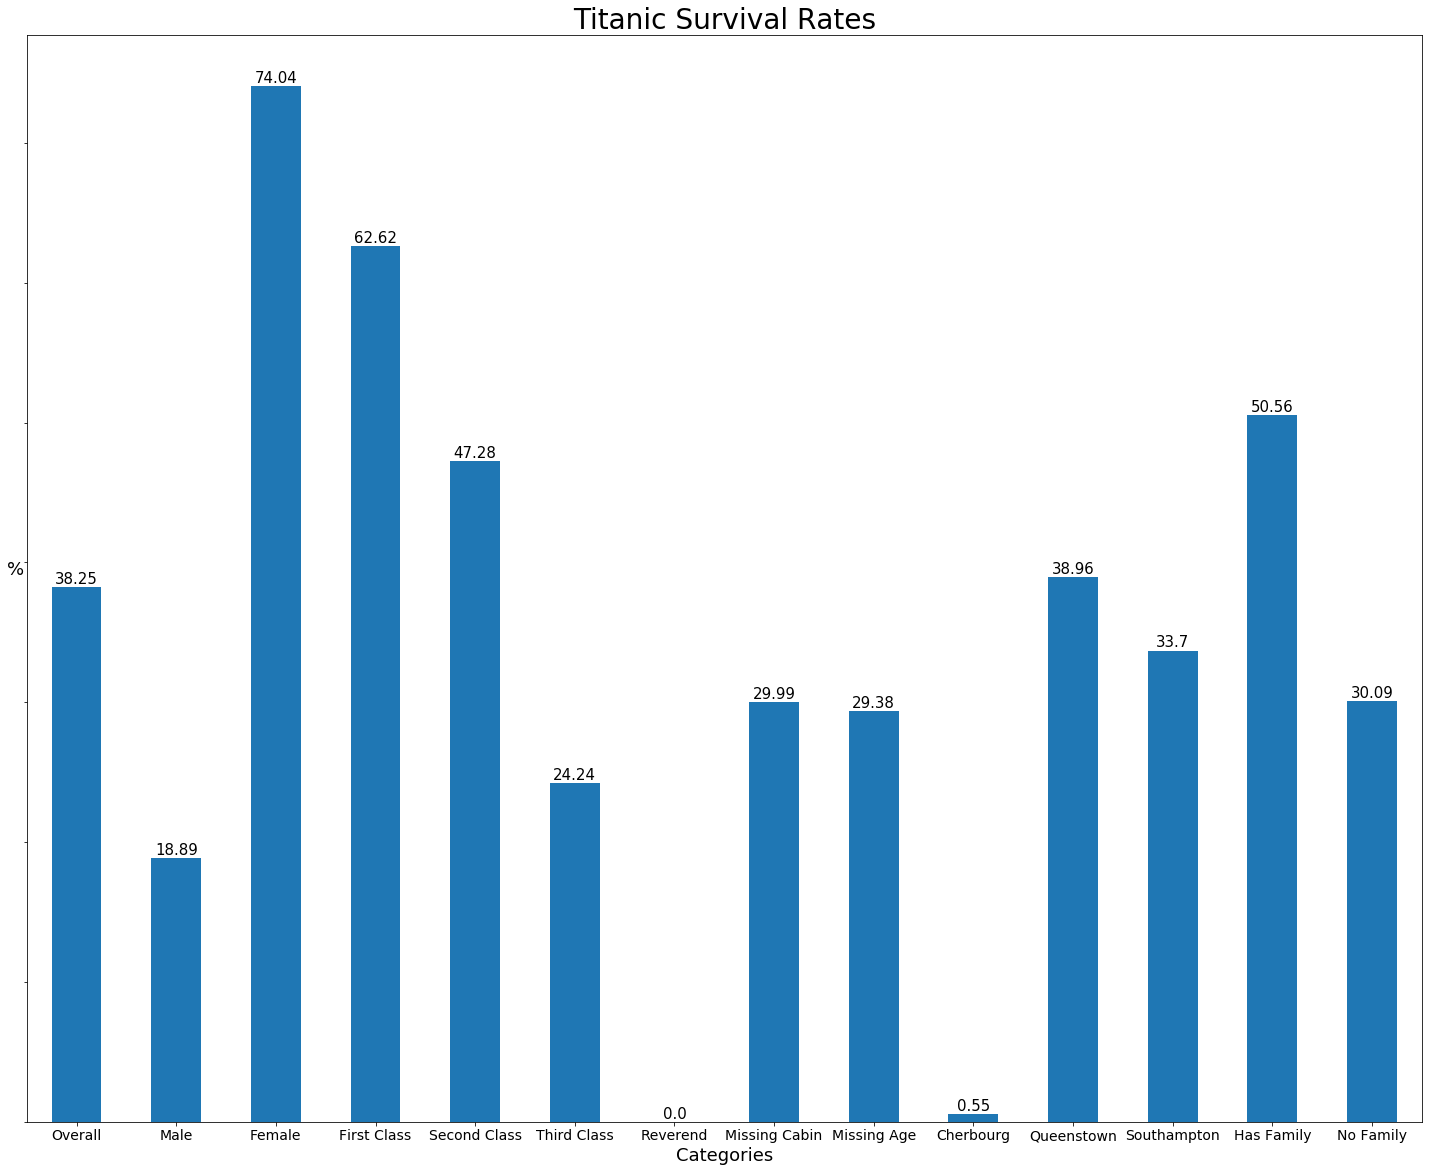

In [57]:
values_series = pd.Series.from_array([38.25, 18.89, 74.04, 62.62, 47.28, 24.24, 0, 29.99, 29.38, .55, 38.96,
                                      33.7, 50.56, 30.09])
x_labels = ['Overall', 'Male', 'Female', 'First Class', 'Second Class', 'Third Class', 'Reverend', 'Missing Cabin',
            'Missing Age', 'Cherbourg', 'Queenstown', 'Southampton', 'Has Family', 'No Family']

plt.figure(1, figsize=(25, 20))
ax = values_series.plot(kind='bar')
ax.set_title("Titanic Survival Rates", fontsize=28)
ax.set_xlabel("Categories", fontsize=18)
ax.set_xticklabels(x_labels, fontsize=14, rotation=0)
ax.set_ylabel("%", fontsize=18, rotation = 0)
ax.set_yticklabels('')

# Adding Data Label
rects = ax.patches
labels = [i for i in values_series]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+0.05, label, ha='center', va='bottom', fontsize=15)

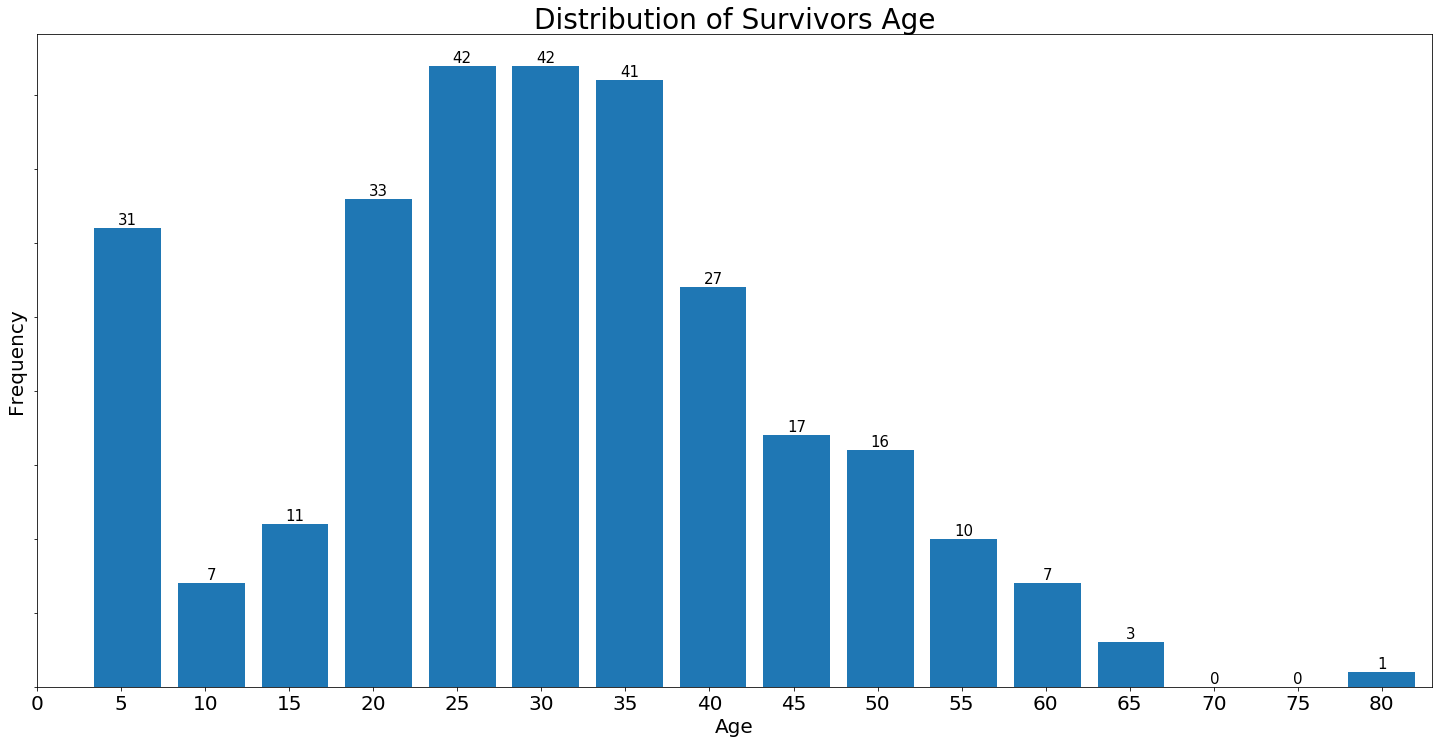

In [45]:
# New DataFrame of Survived and Age is not missing, elected to remove missing Ages do to overall low survival rate
df1a = df1[df1['Survived'] & df1['Age']]

age_values = df1a['Age']
age_series = pd.Series([31, 7, 11, 33, 42, 42, 41, 27, 17, 16, 10, 7, 3, 0, 0, 1])

plt.figure(2, figsize=(25,12))
ax1 = age_values.hist(bins=16, rwidth=.8, align='right')
ax1.set_title("Distribution of Survivors Age", fontsize=28)
ax1.set_xlabel("Age", fontsize=20)
ax1.set_xlim(xmin=2,xmax=83)
plt.xticks(np.arange(0, max(age_values)+1, 5), fontsize=20)
ax1.set_ylabel("Frequency", fontsize=20)
ax1.set_yticklabels('')
ax1.grid(False)

rects1 = ax1.patches
labels1 = [i for i in age_series]
for rect, label in zip(rects1, labels1):
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2, height+0.05, label, ha='center', va='bottom', fontsize=15)

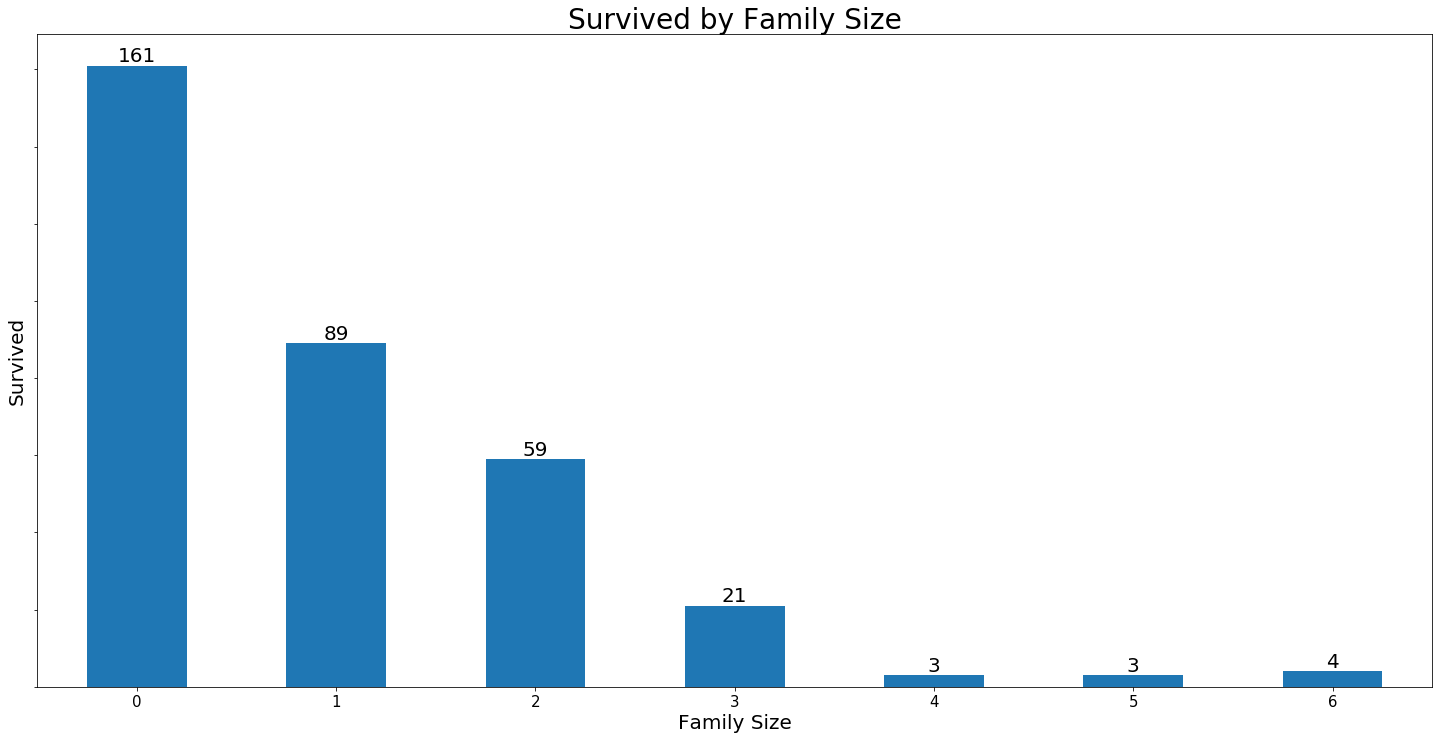

In [51]:
# New DataFrame of Survived
df1s = df1[df1['Survived'] == 1]

fam_values = df1s['FamilyCount'].value_counts()
fam_order = [0, 1, 2, 3, 4, 5, 6]
fam_series = pd.Series.from_array([161, 89, 59, 21, 3, 3, 4])

plt.figure(3, figsize=(25,12))
ax2 = fam_values.loc[fam_order].plot(kind='bar')
ax2.set_title('Survived by Family Size', fontsize=28)
ax2.set_xlabel('Family Size', fontsize=20)
plt.xticks(rotation=0, fontsize=15)
ax2.set_ylabel('Survived', fontsize=20)
ax2.set_yticklabels('')

rects2 = ax2.patches
labels2 = [i for i in fam_series]
for rect, label in zip(rects2, labels2):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2, height+0.05, label, ha='center', va='bottom', fontsize=20)